In [5]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [2]:
df1 = pd.read_csv("Admission_Predict_Ver1.1.csv").iloc[:,1:]
df2 = pd.read_csv("Admission_Predict.csv").iloc[:,1:]
df = pd.concat([df1, df2]).drop_duplicates()
df = df.rename(columns={"LOR " : "LOR", "Chance of Admit ": "Chance of Admit"})
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 19 hours 45 mins
H2O_cluster_timezone:,America/Monterrey
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_miguel_mfdxib
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.727 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [7]:
df = h2o.import_file("df.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [9]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [10]:
aml.train(training_frame = train, y = "Chance of Admit")

AutoML progress: |███████████
22:18:08.752: DeepLearning_1_AutoML_2_20220517_221751 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_2_20220517_221751_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20220517_221751_model_11


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,63.0,63.0,9430.0,3.0,3.0,3.0,5.0,8.0,7.285714




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0013501462359519784
RMSE: 0.03674433610710606
MAE: 0.027336117192989087
RMSLE: 0.022529908127525138
Mean Residual Deviance: 0.0013501462359519784

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.002637458332444476
RMSE: 0.05135619078985976
MAE: 0.03787454911864095
RMSLE: 0.03166285639195855
Mean Residual Deviance: 0.002637458332444476

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.037984,0.001382,0.039176,0.038759,0.036938,0.038955,0.036092
1,mean_residual_deviance,0.002645,0.000290,0.002875,0.002584,0.002816,0.002784,0.002164
2,mse,0.002645,0.000290,0.002875,0.002584,0.002816,0.002784,0.002164
3,r2,0.866776,0.016898,0.855295,0.855544,0.856558,0.872345,0.894141
4,residual_deviance,0.002645,0.000290,0.002875,0.002584,0.002816,0.002784,0.002164
5,rmse,0.051361,0.002904,0.053618,0.050836,0.053069,0.052767,0.046516
6,rmsle,0.031650,0.001886,0.032758,0.031316,0.033319,0.032316,0.028542



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-05-17 22:19:46,1.123 sec,0.0,0.141210,0.114144,0.019940
1,,2022-05-17 22:19:46,1.135 sec,5.0,0.098244,0.078724,0.009652
2,,2022-05-17 22:19:46,1.151 sec,10.0,0.075348,0.059885,0.005677
3,,2022-05-17 22:19:46,1.162 sec,15.0,0.060416,0.047233,0.003650
4,,2022-05-17 22:19:46,1.171 sec,20.0,0.053142,0.040903,0.002824
5,,2022-05-17 22:19:46,1.180 sec,25.0,0.048409,0.036690,0.002343
6,,2022-05-17 22:19:46,1.189 sec,30.0,0.046208,0.034364,0.002135
7,,2022-05-17 22:19:46,1.198 sec,35.0,0.044564,0.032985,0.001986
8,,2022-05-17 22:19:46,1.209 sec,40.0,0.041751,0.030753,0.001743
9,,2022-05-17 22:19:46,1.220 sec,45.0,0.040818,0.029963,0.001666



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CGPA,14.869491,1.000000,0.408809
1,GRE Score,8.219847,0.552799,0.225989
2,TOEFL Score,5.128997,0.344934,0.141012
3,University Rating,2.664012,0.179160,0.073242
4,C1,2.188416,0.147175,0.060166
5,SOP,1.438459,0.096739,0.039548
6,LOR,1.131424,0.076090,0.031106
7,Research,0.732077,0.049233,0.020127


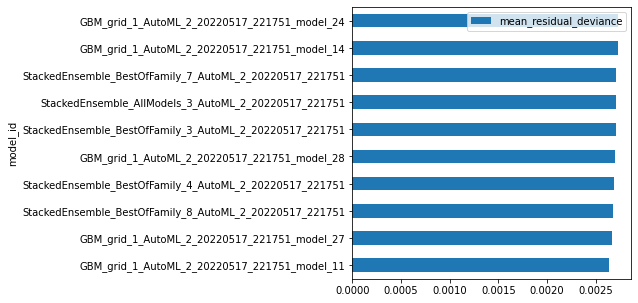

In [116]:
lb.as_data_frame().iloc[:10][["model_id", "mean_residual_deviance"]].plot.barh(x = "model_id", y = "mean_residual_deviance", figsize = (5,5))

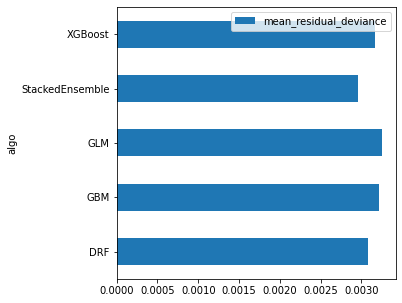

In [117]:
lb.as_data_frame().groupby(["algo"]).mean().reset_index().plot.barh(x = "algo", y = "mean_residual_deviance", figsize = (5,5))

In [15]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20220517_221751_model_11,0.00263746,0.0513562,0.00263746,0.0378745,0.0316629,149,0.009742,GBM
GBM_grid_1_AutoML_2_20220517_221751_model_27,0.00266264,0.0516008,0.00266264,0.0382514,0.0317292,281,0.010246,GBM
StackedEnsemble_BestOfFamily_8_AutoML_2_20220517_221751,0.00267716,0.0517412,0.00267716,0.0378545,0.0319282,121,0.023597,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20220517_221751,0.00268385,0.0518059,0.00268385,0.037825,0.031977,111,0.015381,StackedEnsemble
GBM_grid_1_AutoML_2_20220517_221751_model_28,0.00270264,0.0519869,0.00270264,0.0380928,0.0320998,145,0.007954,GBM
StackedEnsemble_BestOfFamily_3_AutoML_2_20220517_221751,0.00270562,0.0520156,0.00270562,0.0379716,0.0319835,121,0.03054,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20220517_221751,0.00270791,0.0520376,0.00270791,0.0379024,0.0321521,117,0.079259,StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_2_20220517_221751,0.00271275,0.052084,0.00271275,0.0374724,0.0322254,437,0.021959,StackedEnsemble
GBM_grid_1_AutoML_2_20220517_221751_model_14,0.00272782,0.0522286,0.00272782,0.0380221,0.0321859,218,0.008359,GBM
GBM_grid_1_AutoML_2_20220517_221751_model_24,0.0027295,0.0522446,0.0027295,0.0385732,0.0323243,145,0.008706,GBM


In [94]:
lb.as_data_frame().groupby(["algo"]).mean()

,mean_residual_deviance,rmse,mse,mae,rmsle
algo,,,,,
DRF,0.003085,0.055539,0.003085,0.040247,0.034291
GBM,0.003213,0.056324,0.003213,0.041714,0.034656
GLM,0.003256,0.057065,0.003256,0.041437,0.035155
StackedEnsemble,0.002960,0.054294,0.002960,0.039636,0.033483
XGBoost,0.003168,0.056244,0.003168,0.041340,0.034524


In [93]:
lb.as_data_frame().to_csv("leaderboard.csv")

In [64]:
model_ids = lb.as_data_frame()["model_id"]

In [86]:
errors = {}

for id in model_ids[:10]:
    model = h2o.get_model(id)
    y_true = test["Chance of Admit"]
    y_pred = model.predict( test )
    error = y_true - y_pred

    errors[id] = error.as_data_frame().values[:,0]

errors = pd.DataFrame(errors)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


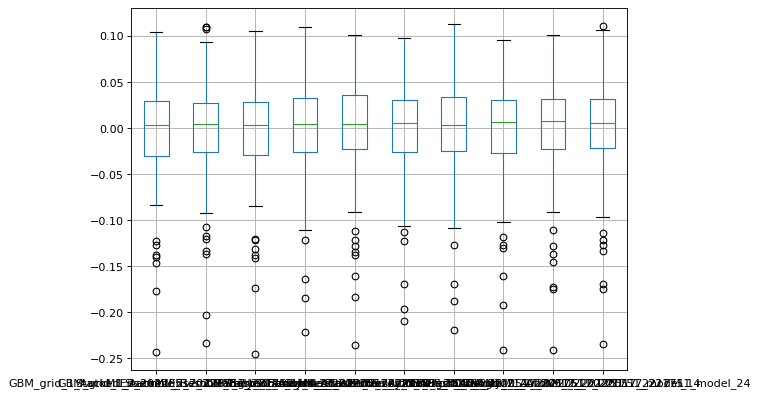

In [92]:

%matplotlib inline
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
errors.boxplot()

In [44]:
lb.as_data_frame()["algo"].unique()

array(['GBM', 'StackedEnsemble', 'XGBoost', 'DRF', 'GLM'], dtype=object)

In [16]:
best_model = aml.get_best_model()

In [19]:
# Get AutoML event log
log = aml.event_log

# Get training timing info
info = aml.training_info



In [60]:
h2o.get_model("GBM_grid_1_AutoML_2_20220517_221751_model_27")

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20220517_221751_model_27


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,49.0,49.0,17555.0,6.0,13.0,8.816326,22.0,26.0,23.87755




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0009457357967031006
RMSE: 0.030752817703473947
MAE: 0.021597812952279437
RMSLE: 0.01917376047817421
Mean Residual Deviance: 0.0009457357967031006

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.002662639846395796
RMSE: 0.05160077369958513
MAE: 0.03825143346370297
RMSLE: 0.031729201488856044
Mean Residual Deviance: 0.002662639846395796

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.038157,0.000653,0.038267,0.037532,0.038554,0.038972,0.037462
1,mean_residual_deviance,0.002665,0.000240,0.002811,0.002481,0.002943,0.002732,0.002359
2,mse,0.002665,0.000240,0.002811,0.002481,0.002943,0.002732,0.002359
3,r2,0.865856,0.013725,0.858488,0.861311,0.850117,0.874761,0.884605
4,residual_deviance,0.002665,0.000240,0.002811,0.002481,0.002943,0.002732,0.002359
5,rmse,0.051583,0.002339,0.053023,0.049811,0.054247,0.052266,0.048566
6,rmsle,0.031705,0.001538,0.032376,0.030604,0.033644,0.032156,0.029745



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-05-17 22:19:56,11.933 sec,0.0,0.141210,0.114144,0.019940
1,,2022-05-17 22:19:56,11.957 sec,5.0,0.093522,0.075061,0.008746
2,,2022-05-17 22:19:56,11.991 sec,10.0,0.066378,0.052614,0.004406
3,,2022-05-17 22:19:56,12.013 sec,15.0,0.052201,0.040350,0.002725
4,,2022-05-17 22:19:56,12.035 sec,20.0,0.044769,0.033426,0.002004
5,,2022-05-17 22:19:56,12.057 sec,25.0,0.040164,0.029310,0.001613
6,,2022-05-17 22:19:57,12.080 sec,30.0,0.037441,0.026734,0.001402
7,,2022-05-17 22:19:57,12.106 sec,35.0,0.035499,0.025103,0.001260
8,,2022-05-17 22:19:57,12.136 sec,40.0,0.033606,0.023826,0.001129
9,,2022-05-17 22:19:57,12.164 sec,45.0,0.031872,0.022463,0.001016



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CGPA,13.390168,1.000000,0.362612
1,GRE Score,8.400928,0.627395,0.227501
2,TOEFL Score,5.562245,0.415398,0.150628
3,University Rating,3.526217,0.263344,0.095491
4,SOP,2.513360,0.187702,0.068063
5,C1,2.175205,0.162448,0.058906
6,LOR,0.774226,0.057821,0.020966
7,Research,0.584680,0.043665,0.015833


In [26]:
info.keys()

dict_keys(['creation_epoch', 'start_epoch', 'start_XGBoost_def_2', 'start_GLM_def_1', 'start_GBM_def_5', 'start_StackedEnsemble_best_of_family_1', 'start_XGBoost_def_1', 'start_DRF_def_1', 'start_GBM_def_2', 'start_GBM_def_3', 'start_GBM_def_4', 'start_StackedEnsemble_best_of_family_2', 'start_StackedEnsemble_all_2', 'start_XGBoost_def_3', 'start_DRF_XRT', 'start_GBM_def_1', 'start_DeepLearning_def_1', 'start_StackedEnsemble_best_of_family_3', 'start_StackedEnsemble_all_3', 'start_XGBoost_grid_1', 'start_GBM_grid_1', 'start_DeepLearning_grid_1', 'start_StackedEnsemble_best_of_family_4', 'start_StackedEnsemble_all_4', 'start_DeepLearning_grid_2', 'start_DeepLearning_grid_3', 'start_XGBoost_lr_search', 'start_GBM_lr_annealing', 'start_StackedEnsemble_best_of_family_xgboost', 'start_StackedEnsemble_best_of_family_gbm', 'start_StackedEnsemble_all_xgboost', 'start_StackedEnsemble_all_gbm', 'start_StackedEnsemble_best_of_family_xglm', 'start_StackedEnsemble_all_xglm', 'start_completion_GBM_g

In [49]:
test

C1,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
2,316,104,3,3,3.5,8,1,0.72
9,323,108,3,3.5,3,8.6,0,0.45
20,312,107,3,3,2,7.9,1,0.64
37,300,105,1,1,2,7.8,0,0.58
39,307,108,2,4,3.5,7.7,0,0.48
51,312,100,2,1.5,3.5,7.9,1,0.56
55,320,103,3,3,3,7.7,0,0.64
63,315,107,2,4,3,8.5,1,0.56
64,325,111,3,3,3.5,8.7,0,0.52
72,321,111,5,5,5,9.45,1,0.93


In [50]:
y_true = test["Chance of Admit"]
y_pred = best_model.predict( test )
error = y_true - y_pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


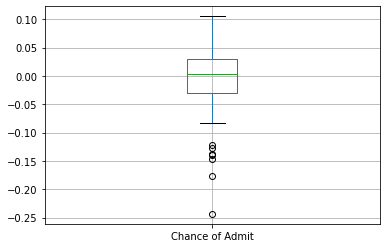

In [55]:
error.as_data_frame().boxplot()

In [31]:
aml.leader.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

In [12]:
best_model.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0034234524168280343
RMSE: 0.05851027616434599
MAE: 0.04191282794733012
RMSLE: 0.03681073338988355
Mean Residual Deviance: 0.0034234524168280343
